In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from pvpro import PvProHandler
from solardatatools import DataHandler

In [2]:
# Import synthetic data
df = pd.read_pickle('synth01_out.pkl')
df.columns

Index(['dni', 'ghi', 'temperature_air', 'wind_speed', 'year', 'month', 'day',
       'hour', 'minute', 'poa_actual', 'poa_meas', 'temperature_module_actual',
       'temperature_cell_actual', 'temperature_module_meas', 'cells_in_series',
       'alpha_sc', 'diode_factor', 'nNsVth_ref', 'photocurrent_ref',
       'saturation_current_ref', 'resistance_shunt_ref',
       'conductance_shunt_extra', 'resistance_series_ref', 'EgRef', 'dEgdT',
       'i_sc', 'v_oc', 'i_mp', 'v_mp', 'p_mp', 'i_x', 'i_xx', 'i_sc_ref',
       'v_oc_ref', 'i_mp_ref', 'v_mp_ref', 'p_mp_ref', 'i_x_ref', 'i_xx_ref',
       'alpha_isc', 'beta_voc', 'alpha_imp', 'beta_vmp', 'gamma_pmp',
       'alpha_i_x', 'alpha_i_xx', 'tempco_photocurrent',
       'tempco_saturation_current', 'tempco_resistance_series',
       'tempco_resistance_shunt', 'tempco_nNsVth', 'v_dc', 'i_dc'],
      dtype='object')

In [3]:
df['resistance_shunt_ref'].mean()

400.0

In [4]:
# Make PvProHandler object to store data.
pvp = PvProHandler(df,
                   system_name='synthetic',
                   delta_T=3,
                   use_clear_times=False,
                   cells_in_series=60,
                   resistance_shunt_ref=df['resistance_shunt_ref'].mean(),
                   alpha_isc=0.001,
                   voltage_key='v_dc',
                   current_key='i_dc',
                   temperature_module_key='temperature_module_meas',
                   irradiance_poa_key='poa_meas',
                   modules_per_string=1,
                   parallel_strings=1,
                   )

In [5]:
pvp.run_preprocess(correct_dst=False, fix_shifts=False)

In [6]:
pvp.dh.report()

Length:                4.01 years
Capacity estimate:     128.54 kW
Data sampling:         15 minute
Data quality score:    95.3%
Data clearness score:  41.3%
Inverter clipping:     False
Time shifts corrected: None
Time zone correction:  None


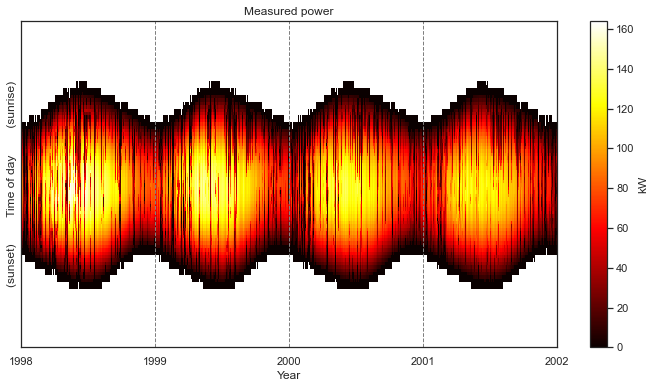

In [7]:
pvp.dh.plot_heatmap();

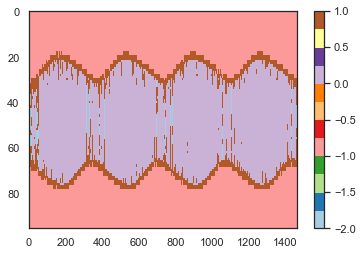

In [8]:
with sns.axes_style('white'):
    pvp.visualize_operating_cls();

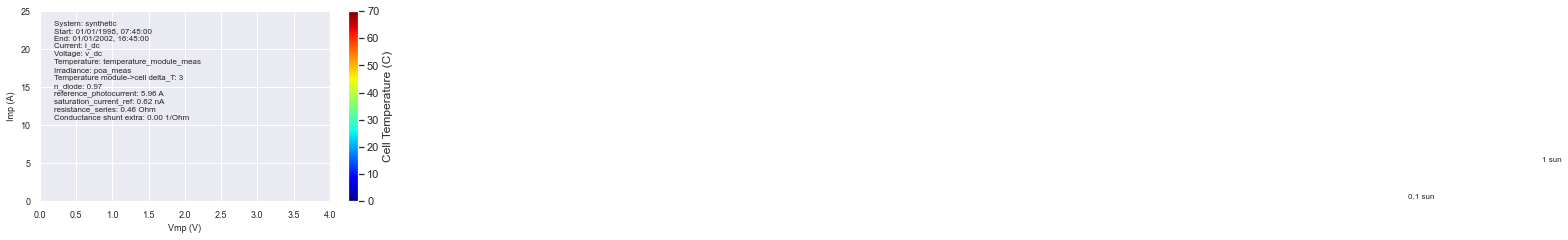

In [9]:
# Plot startpoint on top of data.
fig = pvp.plot_Vmp_Imp_scatter(df=pvp.df,
                         p_plot=pvp.p0,
                         figure_number=4,
                         plot_vmp_max=4,
                         plot_imp_max=25)
# plt.title('Startpoint')
# plt.show()

In [11]:
# Set hyperparameters for running model.
hyperparams = {
    'use_voc_points': True,
    'use_mpp_points': True,
    'use_clip_points': False,
    'method': 'minimize',
    'solver': 'L-BFGS-B',
    'days_per_run': 30,
    'time_step_between_iterations_days': 30,
    'start_point_method': 'last',
    'save_figs_directory': 'figures',
    'plot_imp_max': 7,
    'plot_vmp_max': 35,
    'boolean_mask': None
}


--
Percent complete: 0.0%, Iteration: 0


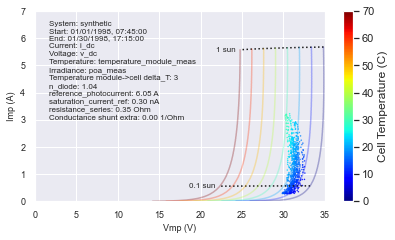

<Figure size 432x288 with 0 Axes>

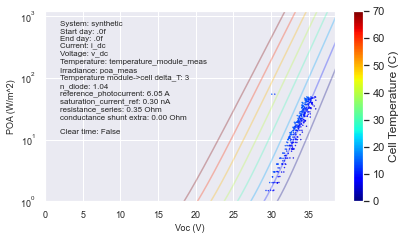

<Figure size 432x288 with 0 Axes>

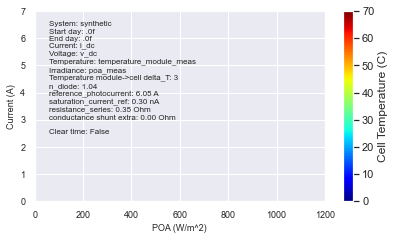

<Figure size 432x288 with 0 Axes>

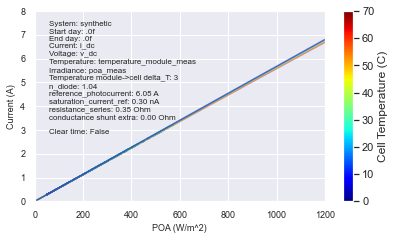


--
Percent complete: 2.1%, Iteration: 1


<Figure size 432x288 with 0 Axes>

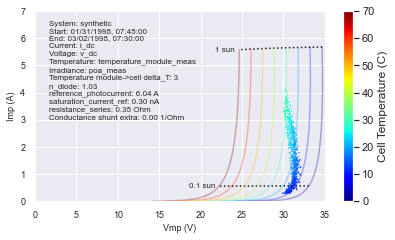

<Figure size 432x288 with 0 Axes>

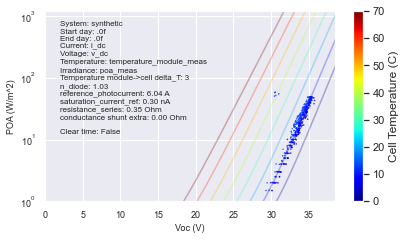

<Figure size 432x288 with 0 Axes>

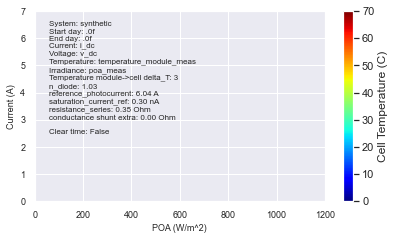

<Figure size 432x288 with 0 Axes>

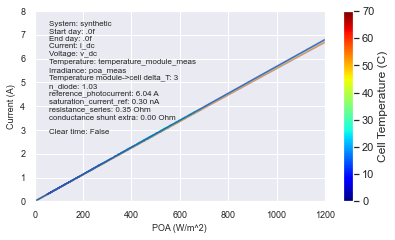


--
Percent complete: 4.2%, Iteration: 2


<Figure size 432x288 with 0 Axes>

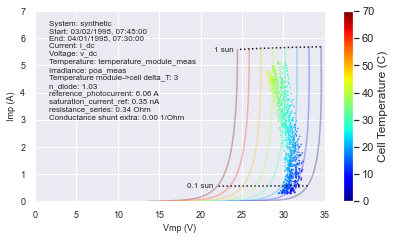

<Figure size 432x288 with 0 Axes>

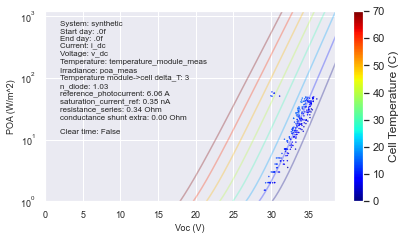

<Figure size 432x288 with 0 Axes>

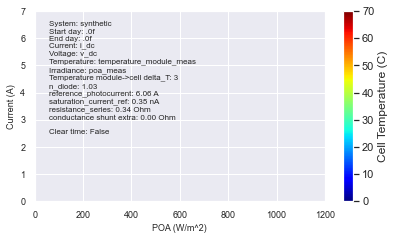

<Figure size 432x288 with 0 Axes>

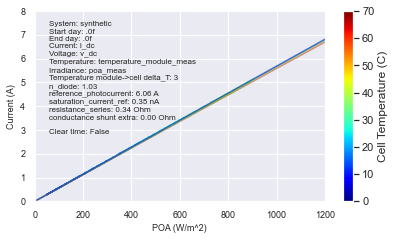

Elapsed time: 0.19 min


<Figure size 432x288 with 0 Axes>

In [12]:
ret = pvp.execute(iteration=[0,1,2],
                      save_figs=True,
                      verbose=False,
                      **hyperparams)

In [15]:
pfit = pvp.result['p']
pfit.head()

,photocurrent_ref,saturation_current_ref,resistance_series_ref,conductance_shunt_extra,diode_factor,residual,i_sc_ref,v_oc_ref,i_mp_ref,v_mp_ref,p_mp_ref,i_x_ref,i_xx_ref,v_mp_ref_est,i_mp_ref_est,p_mp_ref_est,t_start,t_end,nNsVth_ref,t_mean
0,6.04547,3.04757e-10,0.347661,5.68998e-05,1.03781,0.0532554,6.0401,37.9215,5.65507,31.2043,176.463,5.9915,4.15464,31.579164,5.617338,177.390826,1998-01-01 07:45:00,1998-01-30 17:15:00,1.600425,1998-01-16 07:45:00
1,6.0443,3.00635e-10,0.347558,5.53114e-05,1.03256,0.102821,6.03894,37.7512,5.6534,31.0642,175.618,5.99059,4.15025,31.142930,5.657749,176.198865,1998-01-31 07:45:00,1998-03-02 07:30:00,1.592330,1998-02-15 07:45:00
2,6.05616,3.53768e-10,0.344848,8.889e-05,1.03475,0.109682,6.05076,37.5745,5.66081,30.9068,174.957,6.00199,4.15384,31.052282,5.670110,176.069843,1998-03-02 07:45:00,1998-04-01 07:30:00,1.595704,1998-03-17 07:45:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
